# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc
import joblib
import warnings

# Settings

In [ ]:
warnings.filterwarnings('ignore')
%matplotlib inline

# Load Dataset

In [ ]:
data = 'car.data'
df = pd.read_csv(data, header=None)

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving car.data to car (1).data


# Set Column Names

In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names

# Dataset Overview

In [ ]:
print("Dataset Dimensions:", df.shape)
print(df.head())
df.info()

Dataset Dimensions: (1728, 7)
  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


# Value Counts per Column

In [ ]:
for col in col_names:
    print(f"\nValue Counts for '{col}':\n", df[col].value_counts())


Value Counts for 'buying':
 buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

Value Counts for 'maint':
 maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

Value Counts for 'doors':
 doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

Value Counts for 'persons':
 persons
2       576
4       576
more    576
Name: count, dtype: int64

Value Counts for 'lug_boot':
 lug_boot
small    576
med      576
big      576
Name: count, dtype: int64

Value Counts for 'safety':
 safety
low     576
med     576
high    576
Name: count, dtype: int64

Value Counts for 'class':
 class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


# Feature Distribution Visualization

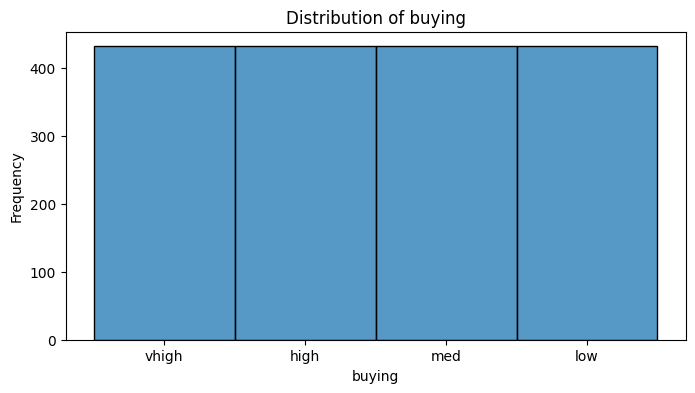

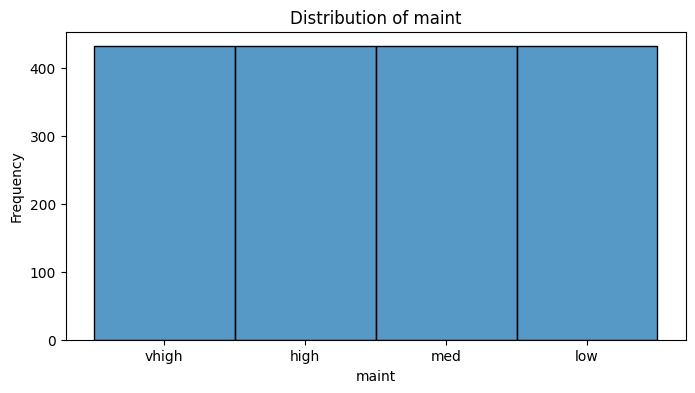

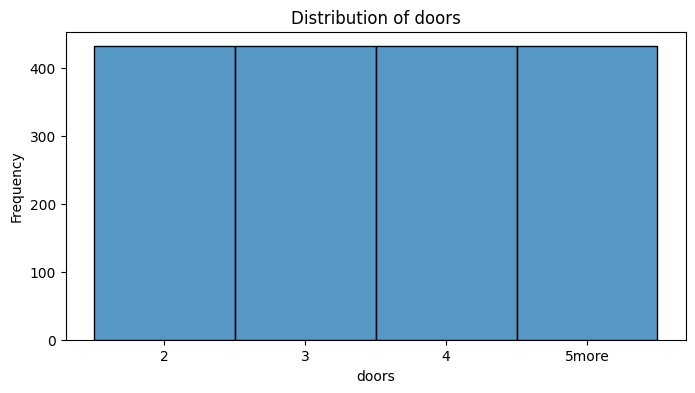

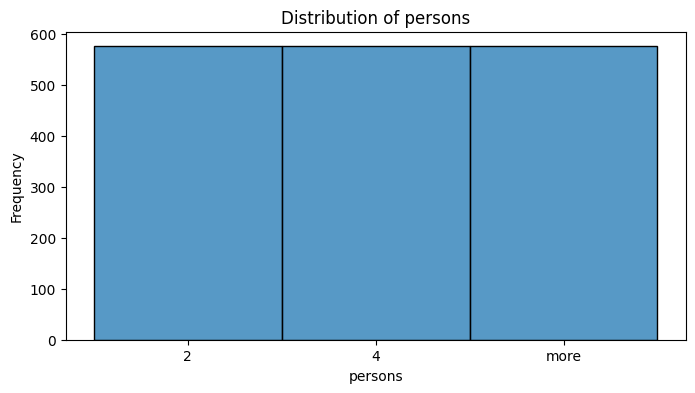

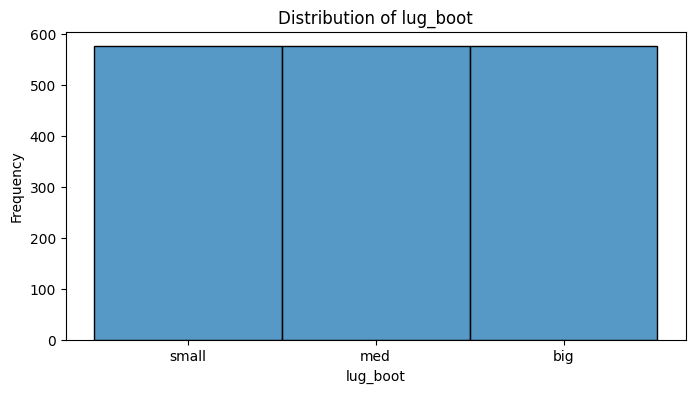

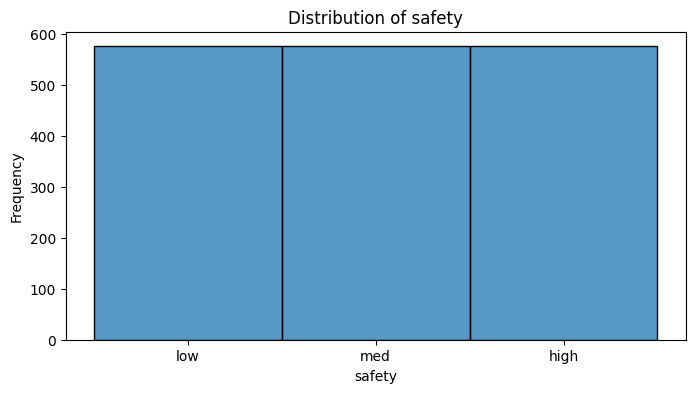

In [ ]:
for column in df.columns[:-1]:  # Exclude target column 'class'
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=False, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Check for Missing Values

In [ ]:
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


## Convert categorical variables into dummy/indicator variables
## Compute correlation matrix

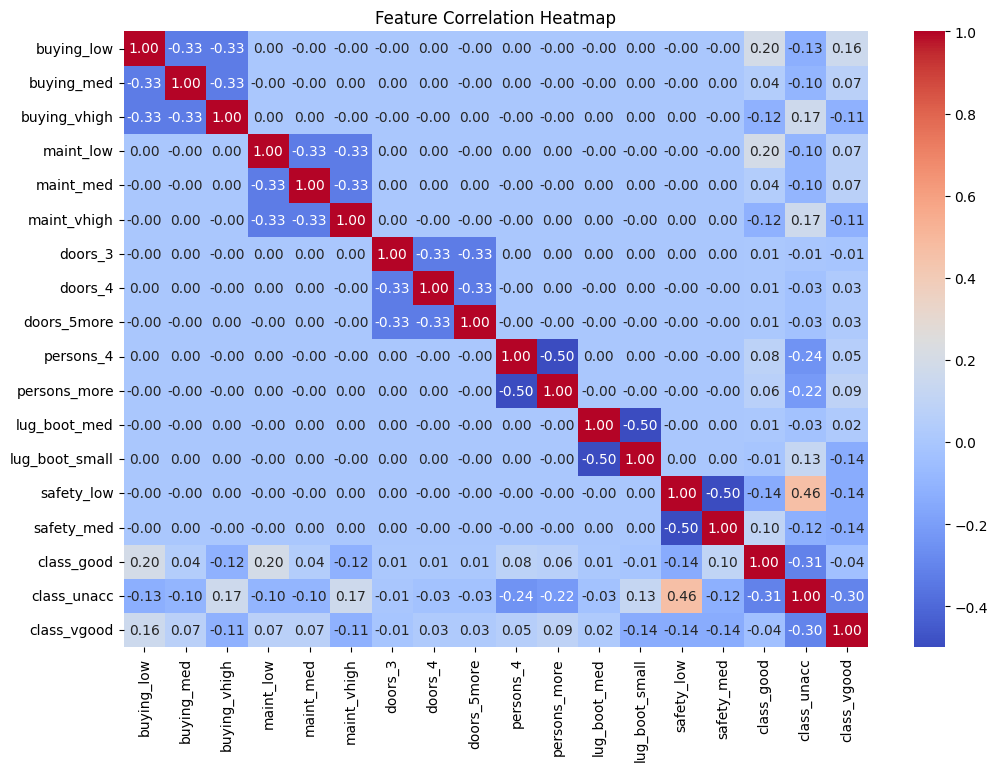

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)


correlation_matrix = df_encoded.corr()

# Plot heatmap with annotations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')  # fmt=".2f" limits values to 2 decimal places
plt.title('Feature Correlation Heatmap')
plt.show()

# Prepare Features and Target for Model

In [ ]:
X = df.drop(['class'], axis=1)
y = df['class']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Encode Categorical Features

In [ ]:
encoder = OrdinalEncoder()
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

# Train Decision Tree with Gini Index

In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

# Predict and Evaluate

In [ ]:
y_pred_gini = clf_gini.predict(X_test)
print('Model accuracy score with criterion gini index: {:.4f}'.format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7653


# Plot Decision Tree

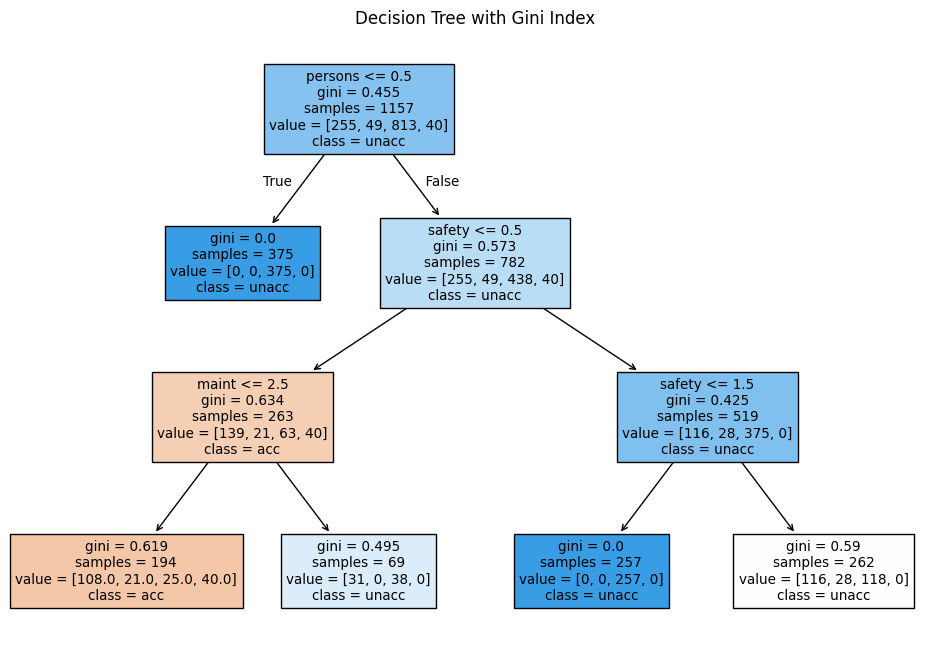

In [ ]:

plt.figure(figsize=(12, 8))
plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=clf_gini.classes_)
plt.title('Decision Tree with Gini Index')
plt.show()

# Accuracy vs Depth for Gini Index

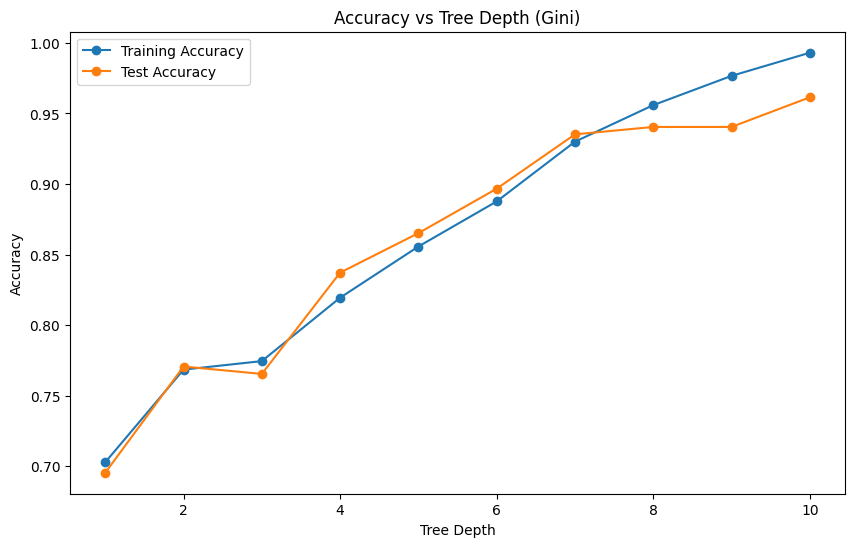

In [ ]:
accuracy_train = []
accuracy_test = []
depth_range = range(1, 11)
for depth in depth_range:
    model = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=0)
    model.fit(X_train, y_train)
    accuracy_train.append(accuracy_score(y_train, model.predict(X_train)))
    accuracy_test.append(accuracy_score(y_test, model.predict(X_test)))
plt.figure(figsize=(10, 6))
plt.plot(depth_range, accuracy_train, label='Training Accuracy', marker='o')
plt.plot(depth_range, accuracy_test, label='Test Accuracy', marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Tree Depth (Gini)')
plt.legend()
plt.show()

# Train Decision Tree with Entropy

In [ ]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)




DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# Predict and Evaluate

In [ ]:
y_pred_en = clf_en.predict(X_test)
print('Model accuracy score with criterion entropy: {:.4f}'.format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7653


# Plot Decision Tree with Entropy

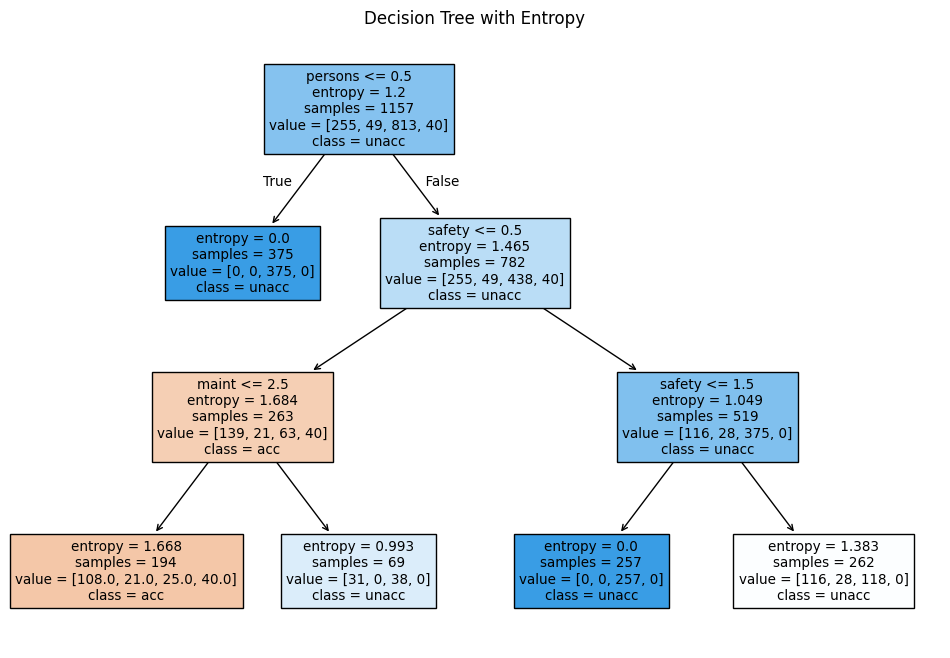

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(clf_en, filled=True, feature_names=X.columns, class_names=clf_en.classes_)
plt.title('Decision Tree with Entropy')
plt.show()

# Confusion Matrix for Entropy Model

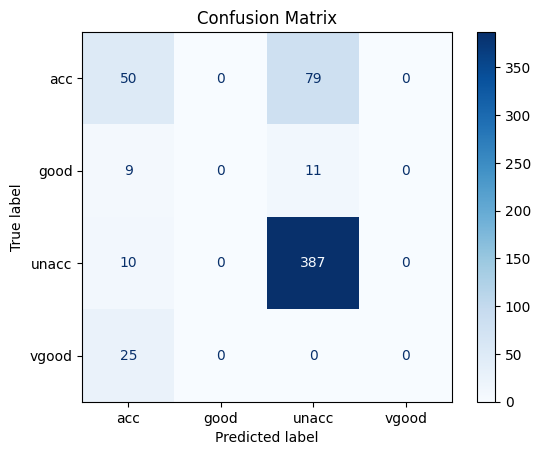

In [ ]:
cm = confusion_matrix(y_test, y_pred_en)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_en.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Classification Report

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred_en))

Classification Report:
               precision    recall  f1-score   support

         acc       0.53      0.39      0.45       129
        good       0.00      0.00      0.00        20
       unacc       0.81      0.97      0.89       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.77       571
   macro avg       0.34      0.34      0.33       571
weighted avg       0.68      0.77      0.72       571



# ROC Curve(Receiver Operating Characteristic)
* pour évaluer les performances d'un modèle de classification binaire en termes de discrimination entre les classes positives et négatives.

In [ ]:
y_pred_proba = clf_en.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label=clf_en.classes_[1])
roc_auc = auc(fpr, tpr)

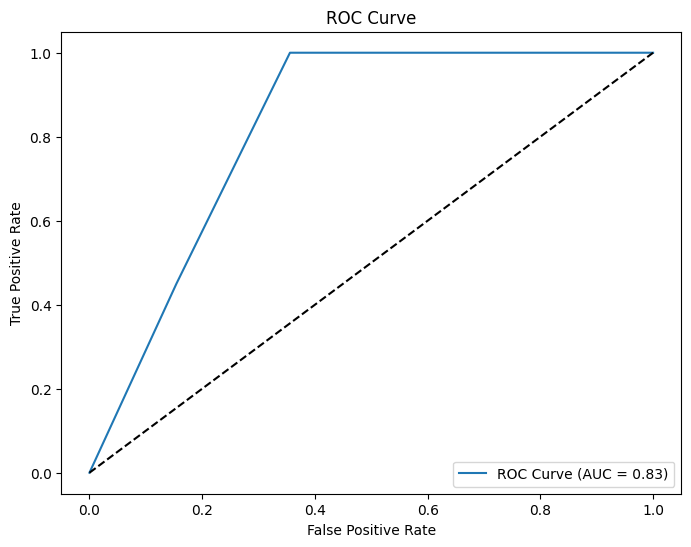

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Hyperparameter Tuning with GridSearchCV

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}
Best cross-validation score: 0.9706262128675922
Meilleurs hyperparamètres trouvés par GridSearchCV : {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}
Meilleur score en validation croisée : 0.9706262128675922
Accuracy sur les données de test : 0.9614711033274956
Rapport de classification :
               precision    recall  f1-score   support

         acc       0.93      0.91      0.92       129
        good       0.69      0.90      0.78        20
       unacc       0.99      0.98      0.99       397
       vgood       0.88      0.88      0.88        25

    accuracy                           0.96       571
   macro avg       0.87      0.92      0.89       571
weighted avg       0.96      0.96      0.96       571



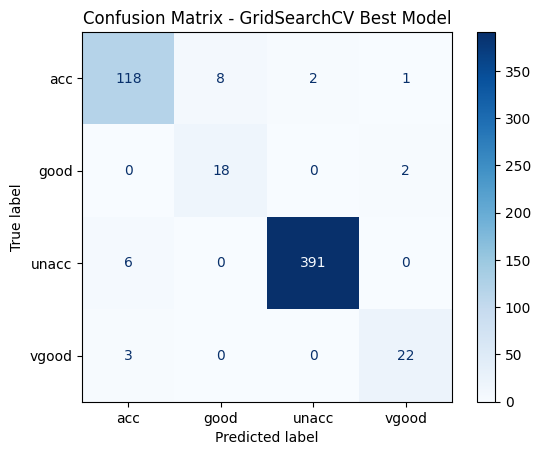

In [ ]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)
# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres trouvés par GridSearchCV :", grid_search.best_params_)

# Afficher le meilleur score de validation croisée
print("Meilleur score en validation croisée :", grid_search.best_score_)

# Faire des prédictions avec le meilleur modèle
y_pred_gs = grid_search.predict(X_test)

# Évaluer les performances sur les données de test
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Accuracy et rapport de classification
print("Accuracy sur les données de test :", accuracy_score(y_test, y_pred_gs))
print("Rapport de classification :\n", classification_report(y_test, y_pred_gs))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_gs)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.best_estimator_.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - GridSearchCV Best Model")
plt.show()



# RandomizedSearchCV

In [ ]:
param_dist = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=0), param_distributions=param_dist, n_iter=50, cv=5, random_state=0, scoring='accuracy')
random_search.fit(X_train, y_train)
y_pred_rs = random_search.predict(X_test)
# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres trouvés par RandomizedSearchCV :", random_search.best_params_)

# Afficher le score de validation croisée pour ces hyperparamètres
print("Meilleur score en validation croisée :", random_search.best_score_)

# Évaluer les performances du modèle sur les données de test
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy sur les données de test :", accuracy_score(y_test, y_pred_rs))
print("Rapport de classification :\n", classification_report(y_test, y_pred_rs))


Meilleurs hyperparamètres trouvés par RandomizedSearchCV : {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'entropy'}
Meilleur score en validation croisée : 0.9723540826989103
Accuracy sur les données de test : 0.9719789842381786
Rapport de classification :
               precision    recall  f1-score   support

         acc       0.96      0.91      0.94       129
        good       0.69      1.00      0.82        20
       unacc       0.99      0.99      0.99       397
       vgood       1.00      0.88      0.94        25

    accuracy                           0.97       571
   macro avg       0.91      0.95      0.92       571
weighted avg       0.98      0.97      0.97       571



# confusion matrix for the entropy model vs confusion matrix for the tuned model

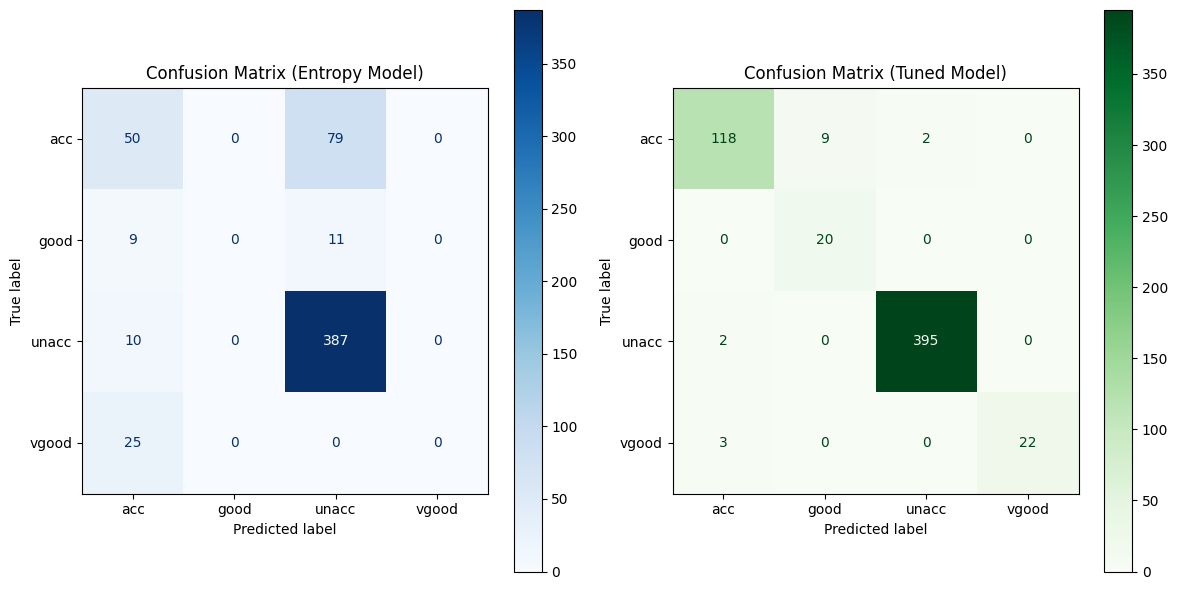

In [ ]:
# Compute the confusion matrix for the entropy model
cm_entropy = confusion_matrix(y_test, y_pred_en)

# Compute the confusion matrix for the tuned model
cm_tuned = confusion_matrix(y_test, y_pred_rs)

# Set up subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix for the entropy model
disp_entropy = ConfusionMatrixDisplay(confusion_matrix=cm_entropy, display_labels=clf_en.classes_)
disp_entropy.plot(cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix (Entropy Model)')

# Plot confusion matrix for the tuned model
disp_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_tuned, display_labels=random_search.best_estimator_.classes_)
disp_tuned.plot(cmap='Greens', ax=ax[1])
ax[1].set_title('Confusion Matrix (Tuned Model)')

# Adjust layout
plt.tight_layout()
plt.show()

# Train Random Forest  Train Gradient Boosting Classifier  with report

In [ ]:
print("Best parameters from RandomizedSearchCV:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)
print("Decision Tree Randomsized Classification Report:\n", classification_report(y_test, y_pred_rs))

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Train Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print('Gradient Boosting Accuracy:', accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))


Best parameters from RandomizedSearchCV: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'entropy'}
Best cross-validation score: 0.9723540826989103
Decision Tree Randomsized Classification Report:
               precision    recall  f1-score   support

         acc       0.96      0.91      0.94       129
        good       0.69      1.00      0.82        20
       unacc       0.99      0.99      0.99       397
       vgood       1.00      0.88      0.94        25

    accuracy                           0.97       571
   macro avg       0.91      0.95      0.92       571
weighted avg       0.98      0.97      0.97       571

Random Forest Accuracy: 0.9597197898423818
Random Forest Classification Report:
               precision    recall  f1-score   support

         acc       0.93      0.89      0.91       129
        good       0.71      0.85      0.77        20
       unacc       0.98      0.99      0.99       397
       vgood       0.92      0.88    

Random Forest Accuracy: 0.9597197898423818
Random Forest Classification Report:
               precision    recall  f1-score   support

         acc       0.93      0.89      0.91       129
        good       0.71      0.85      0.77        20
       unacc       0.98      0.99      0.99       397
       vgood       0.92      0.88      0.90        25

    accuracy                           0.96       571
   macro avg       0.89      0.90      0.89       571
weighted avg       0.96      0.96      0.96       571



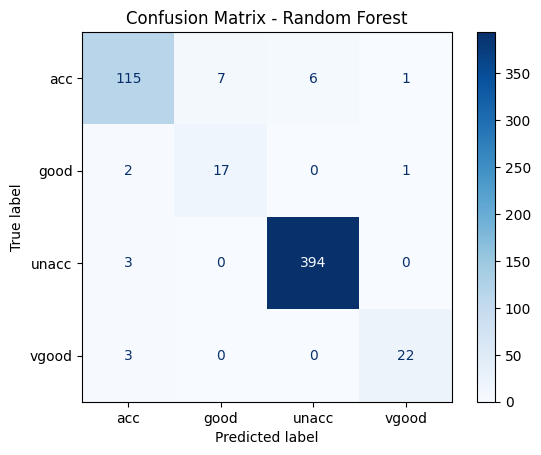

Gradient Boosting Accuracy: 0.9754816112084063
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

         acc       0.98      0.92      0.95       129
        good       0.68      0.95      0.79        20
       unacc       1.00      1.00      1.00       397
       vgood       0.92      0.92      0.92        25

    accuracy                           0.98       571
   macro avg       0.89      0.95      0.92       571
weighted avg       0.98      0.98      0.98       571



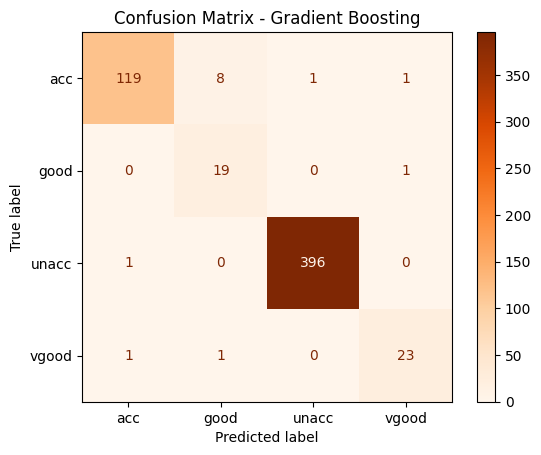

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.classes_)
disp_rf.plot(cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Train Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print('Gradient Boosting Accuracy:', accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))

# Confusion Matrix for Gradient Boosting
cm_gb = confusion_matrix(y_test, y_pred_gb)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=gb.classes_)
disp_gb.plot(cmap='Oranges')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()


Random Forest Accuracy: 0.9597197898423818
Random Forest Classification Report:
               precision    recall  f1-score   support

         acc       0.93      0.89      0.91       129
        good       0.71      0.85      0.77        20
       unacc       0.98      0.99      0.99       397
       vgood       0.92      0.88      0.90        25

    accuracy                           0.96       571
   macro avg       0.89      0.90      0.89       571
weighted avg       0.96      0.96      0.96       571



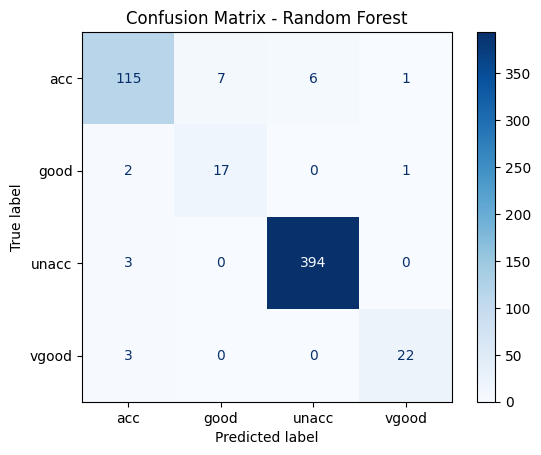

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Accuracy and Classification Report
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.classes_)
disp_rf.plot(cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [ ]:
models = ['Decision Tree', 'Random Forest', 'Gradient Boosting']
accuracies = [accuracy_score(y_test, y_pred_rs), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_gb)]

# Plotting the bar chart  Model Performance Compariso

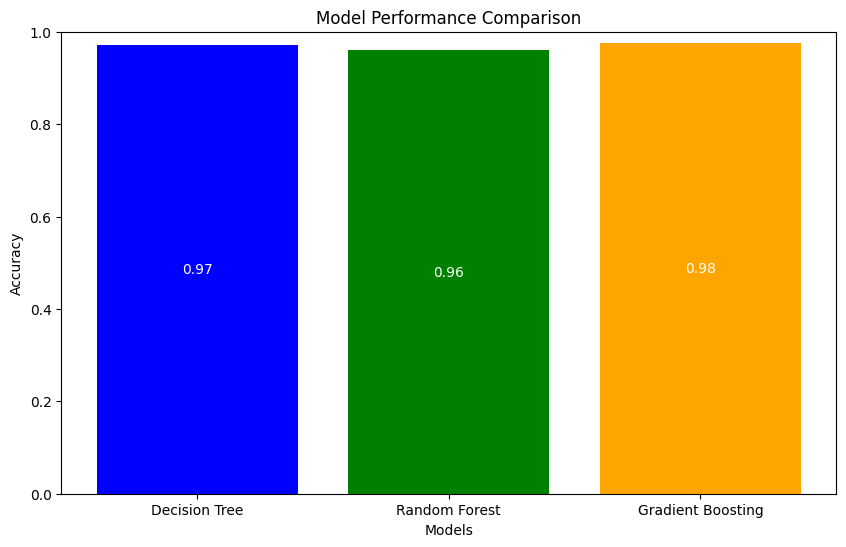

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Add values inside the bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() / 2,  # Position inside the bar
             f"{accuracy:.2f}",
             ha='center', va='center', color='white', fontsize=10)

plt.show()